Підключення необхідний бібліотек та імпортуємо DataSet.

In [467]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = pd.read_csv('ABNB.csv')

Відображаємо перші 5 стовпчиків нашого DataSet.

In [468]:
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


Перевіряємо чи є у нашому DataSet пропущені значення.

In [469]:
if data.isnull().values.any():
    missing_values = data.isnull().values.sum()
    print(f'Кількість пропущенних значень: {missing_values}')
    print(data[data.isnull().values])
    data = data.fillna(method='ffill')
    data = data.fillna(method='bfill')
else:
    print('Наш Dataset не має пропущених значень.')

Наш Dataset не має пропущених значень.


Після виконання команди можемо побачити, що DataSet не містить значень типу "Nan", тому можемо продовжувати роботу.

In [470]:
MatrixView = data[:10]

(MatrixView.style
    .highlight_max(color='green')
    .highlight_min(color='red')
    .set_caption('Таблиця у матричному вигляді.')
)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
2020-12-18,150.449997,159.000000,150.300003,157.300003,157.300003,15954200
2020-12-21,155.309998,172.000000,145.110001,163.020004,163.020004,17788100
2020-12-22,170.000000,174.970001,161.050003,163.190002,163.190002,9872600
2020-12-23,162.813995,168.250000,155.500000,158.009995,158.009995,5852500


Expectation or expected value of an array.

In [471]:
np.mean(data)

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Open         1.527359e+02
High         1.564656e+02
Low          1.489699e+02
Close        1.527292e+02
Adj Close    1.527292e+02
Volume       6.690328e+06
dtype: float64

Dispersion.

In [472]:
np.var(data)

Open         8.014392e+02
High         8.453986e+02
Low          7.540478e+02
Close        7.949893e+02
Adj Close    7.949893e+02
Volume       1.947032e+13
dtype: float64

Data standardization.

In [473]:
data_normalized = data.copy()

scaler = preprocessing.MinMaxScaler()
#data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=[i for i in range(1, len(data)+1)])
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data_normalized

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,0.452811,0.467310,0.395408,0.392689,0.392689,0.661697
2020-12-14,0.362123,0.341220,0.314185,0.320288,0.320288,0.396474
2020-12-15,0.296875,0.281289,0.284278,0.279587,0.279587,0.236205
2020-12-16,0.290123,0.393369,0.312143,0.382827,0.382827,0.487669
2020-12-17,0.424937,0.474704,0.457264,0.453741,0.453741,0.345854
...,...,...,...,...,...,...
2022-09-26,0.101288,0.108188,0.121343,0.110755,0.110755,0.086955
2022-09-27,0.134736,0.130059,0.142425,0.135332,0.135332,0.081717
2022-09-28,0.139926,0.153098,0.155826,0.169145,0.169145,0.066812


Line Plot

([<matplotlib.axis.XTick at 0x28c0dbef610>,
 [Text(1, 0, '2020-12-14'),
  Text(51, 0, '2021-02-26'),
  Text(101, 0, '2021-05-10'),
  Text(151, 0, '2021-07-21'),
  Text(201, 0, '2021-09-30'),
  Text(251, 0, '2021-12-10'),
  Text(301, 0, '2022-02-23'),
  Text(351, 0, '2022-05-05'),
  Text(401, 0, '2022-07-19'),
  Text(451, 0, '2022-09-28')])

C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


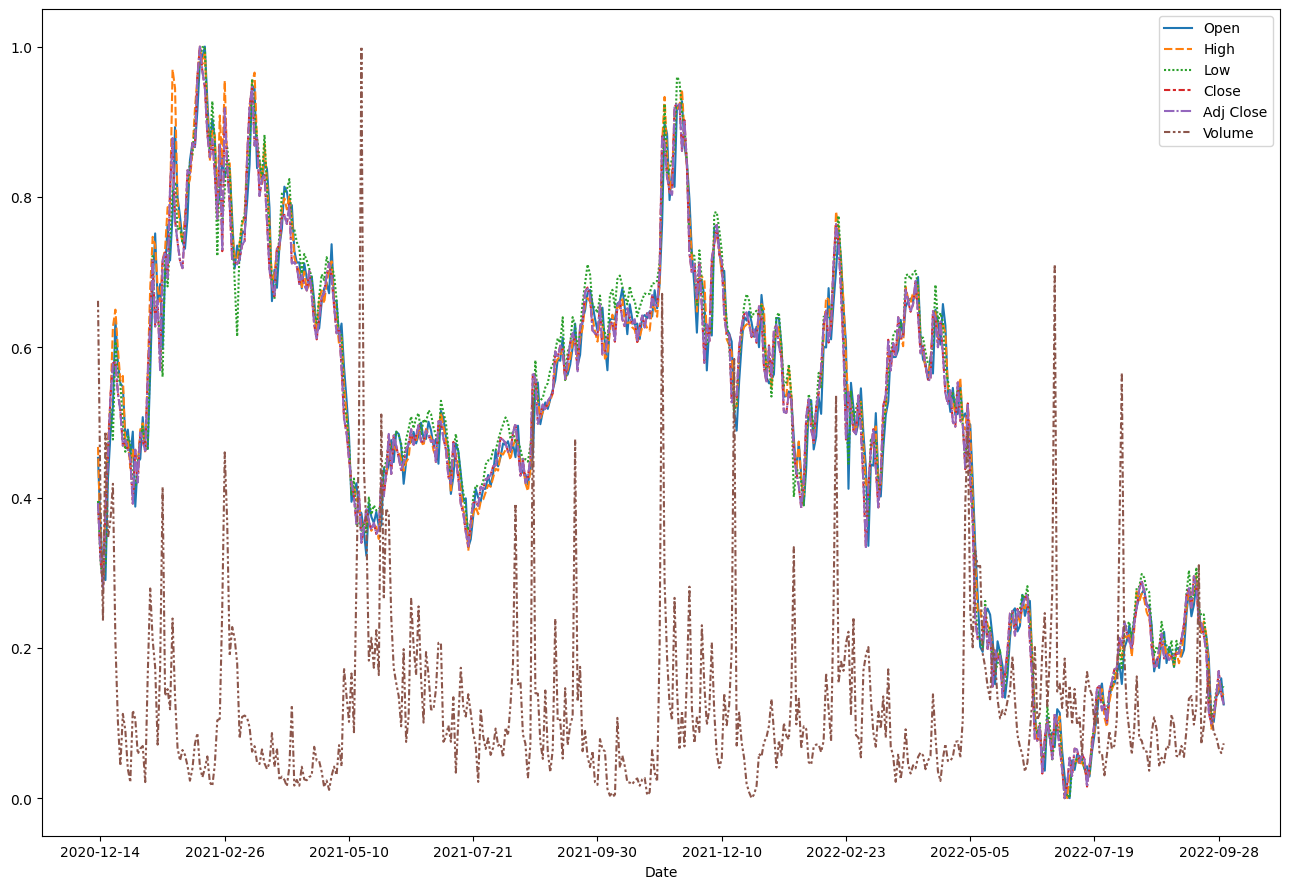

In [474]:
plt.figure(figsize=(13,9))
sns.lineplot(data=data_normalized)
indexes = range(1, len(data_normalized), 50)
plt.xticks(indexes)

Bar Plot

([<matplotlib.axis.XTick at 0x28c1001e110>,
 [Text(1, 0, '2020-12-14'),
  Text(51, 0, '2021-02-26'),
  Text(101, 0, '2021-05-10'),
  Text(151, 0, '2021-07-21'),
  Text(201, 0, '2021-09-30'),
  Text(251, 0, '2021-12-10'),
  Text(301, 0, '2022-02-23'),
  Text(351, 0, '2022-05-05'),
  Text(401, 0, '2022-07-19'),
  Text(451, 0, '2022-09-28')])

C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


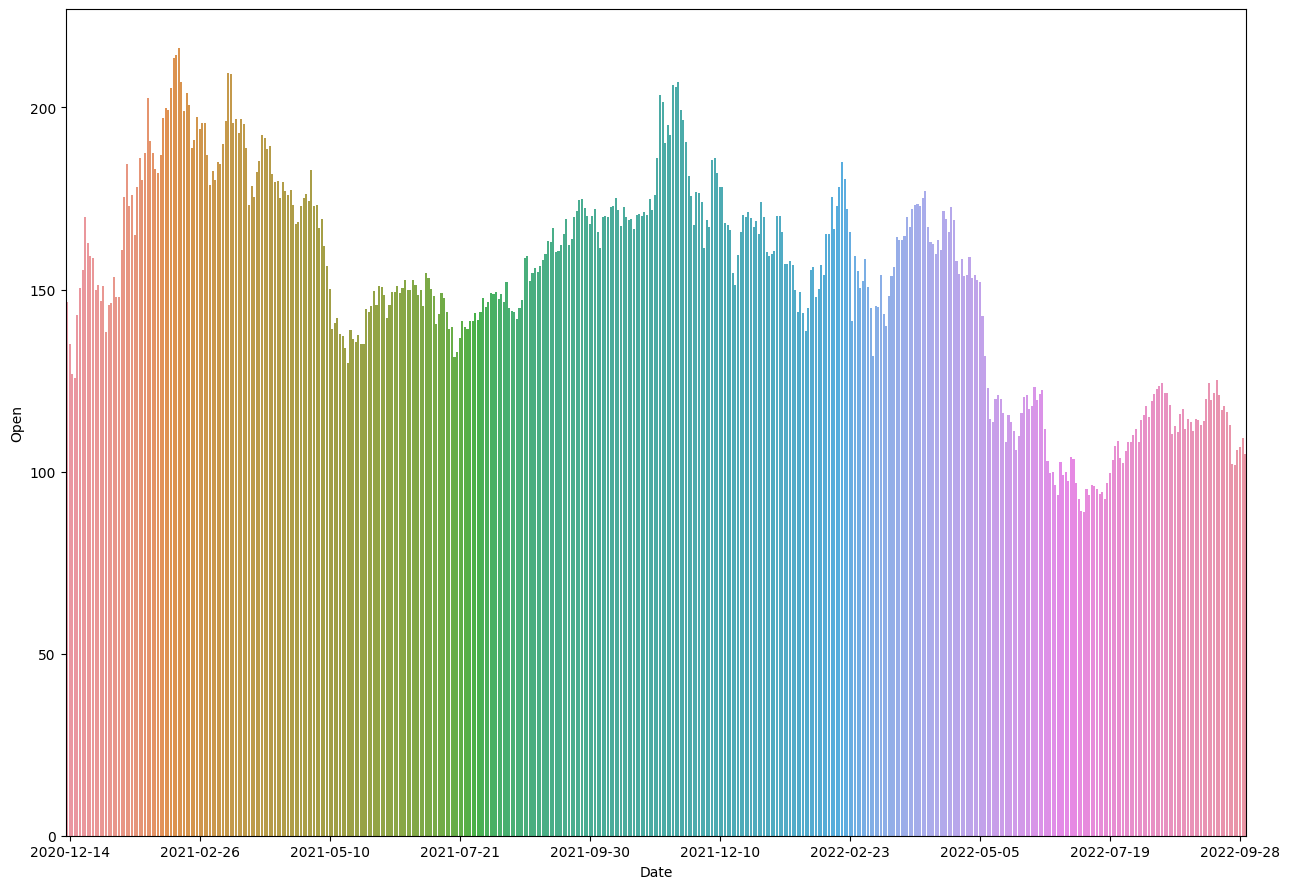

In [475]:
plt.figure(figsize=(13,9))
sns.barplot(x=data.index, y=data['Open'])
plt.xticks(indexes)

Heat Map

<AxesSubplot: ylabel='Date'>

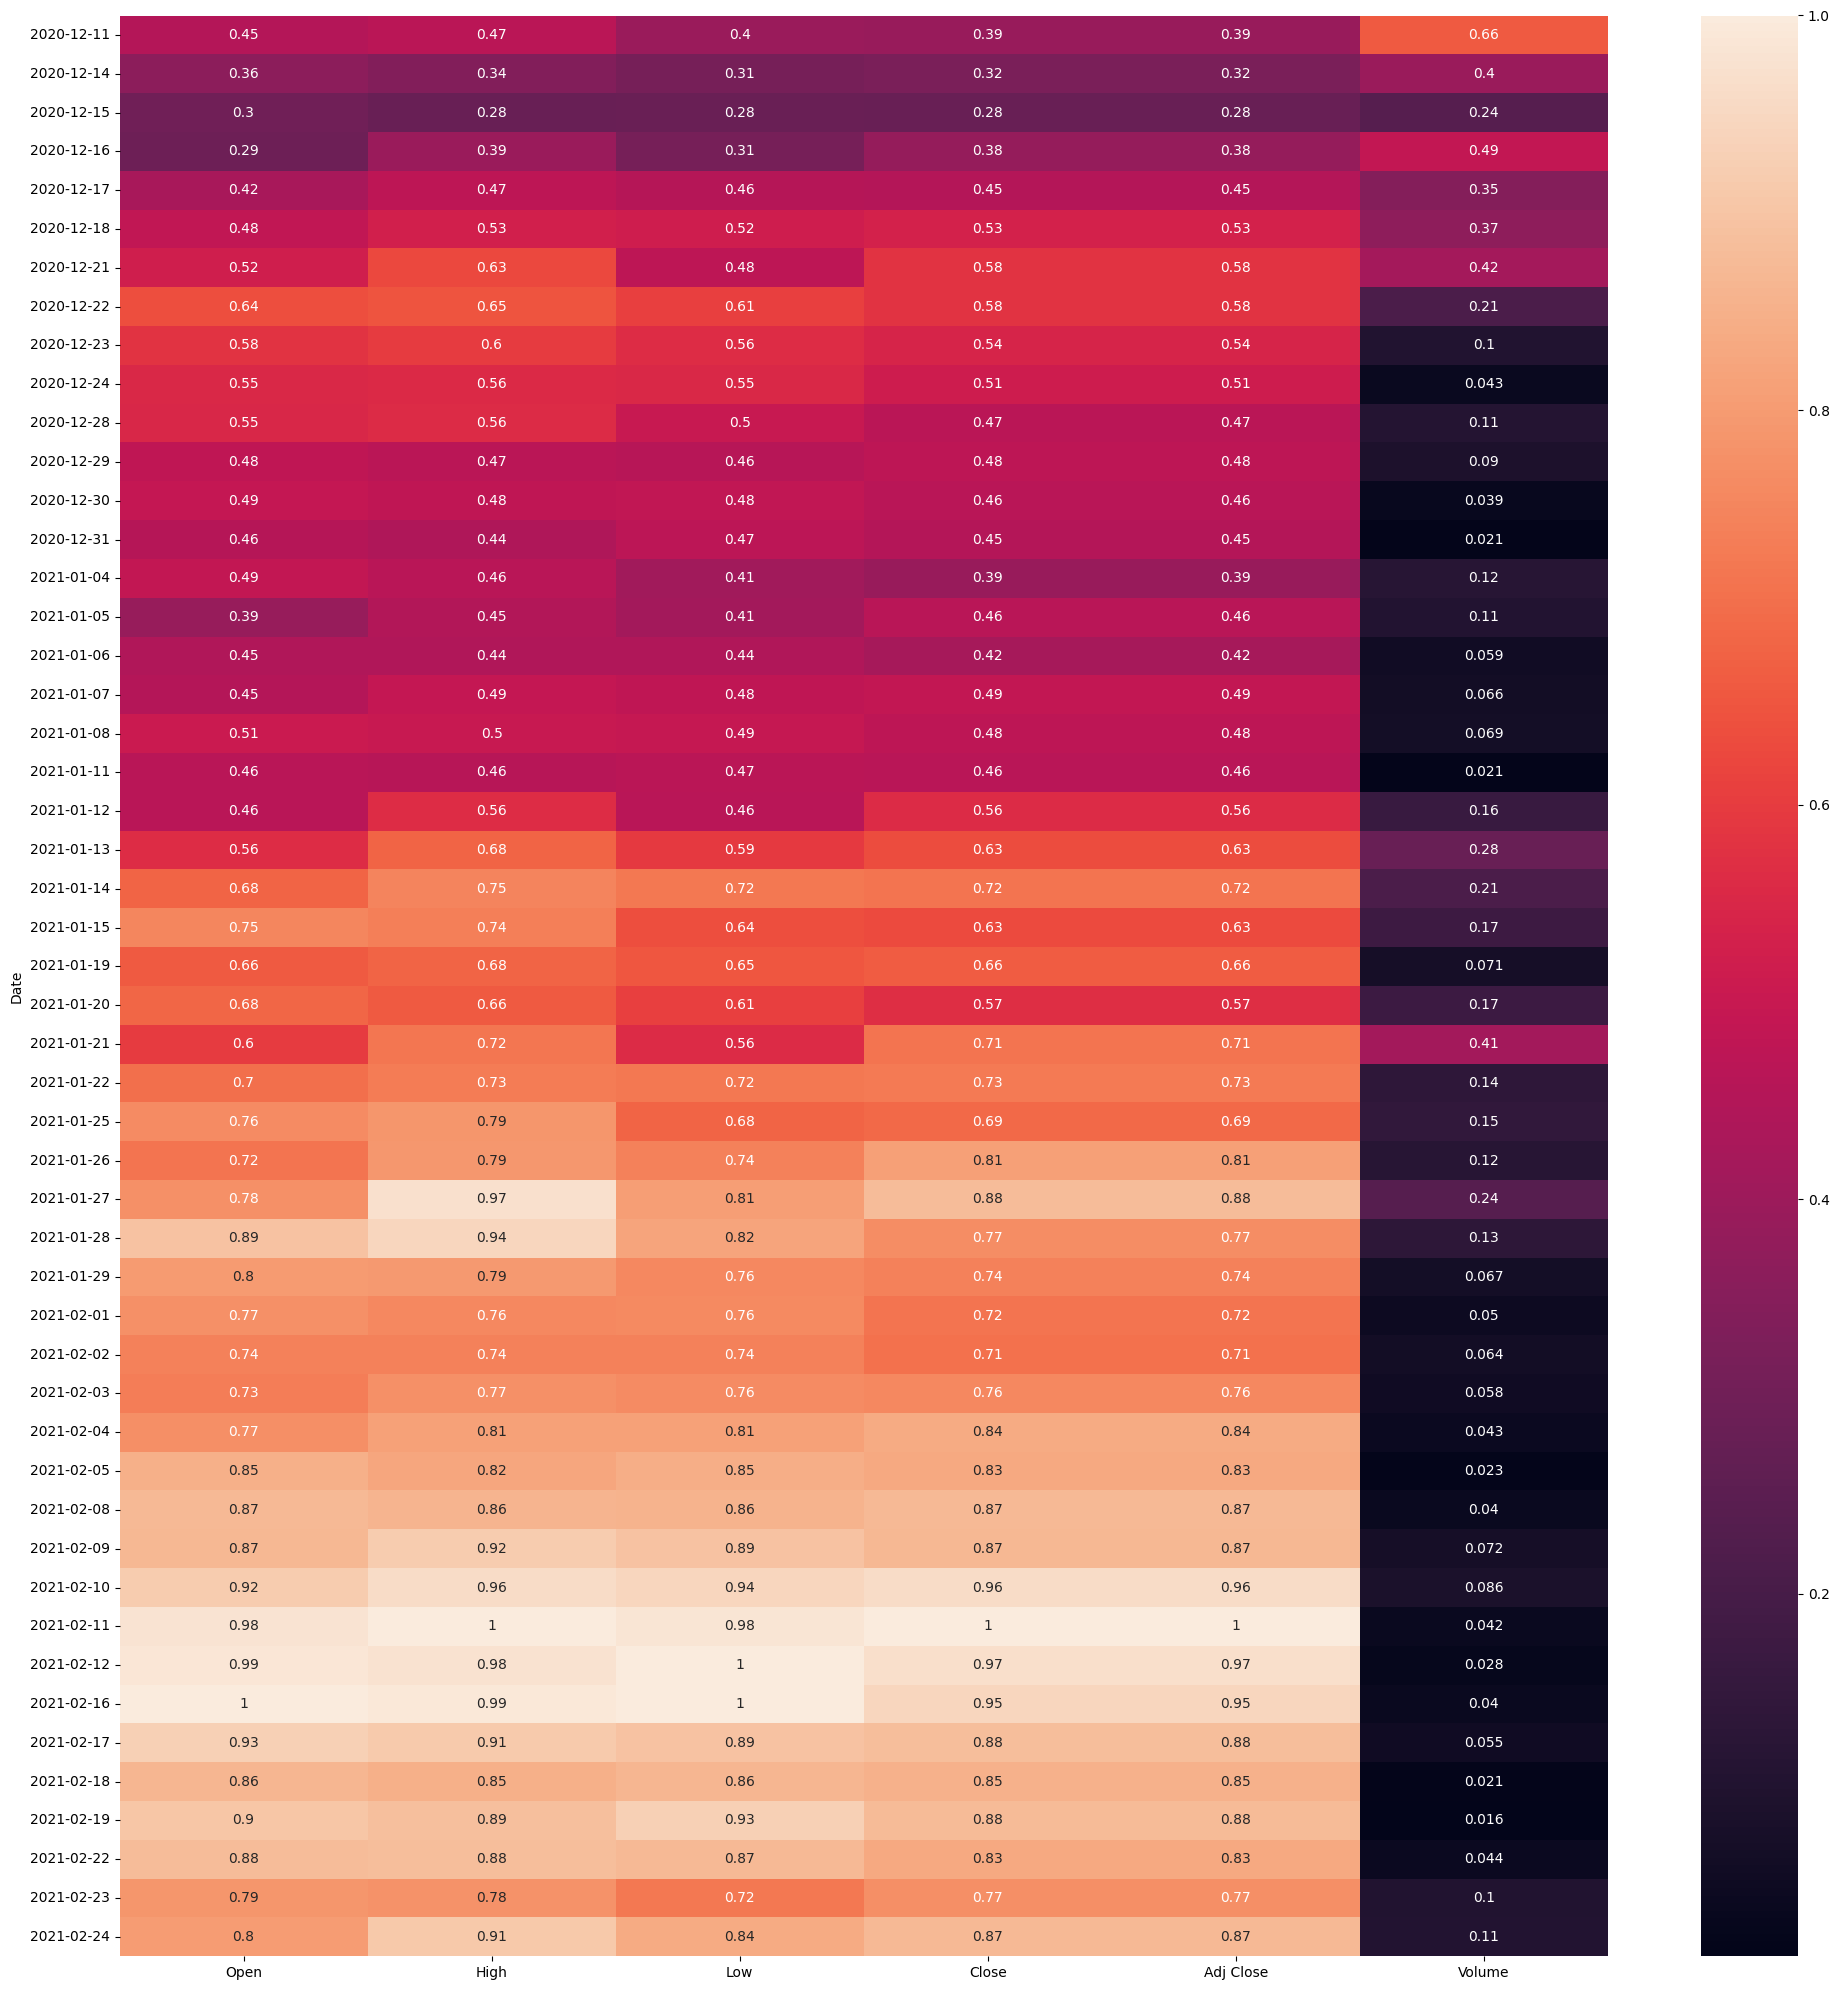

In [476]:
plt.figure(figsize=(20,20))
sns.heatmap(data=data_normalized[:50], annot=True)

Histplot

StopIteration: 

C:\Users\alexi\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


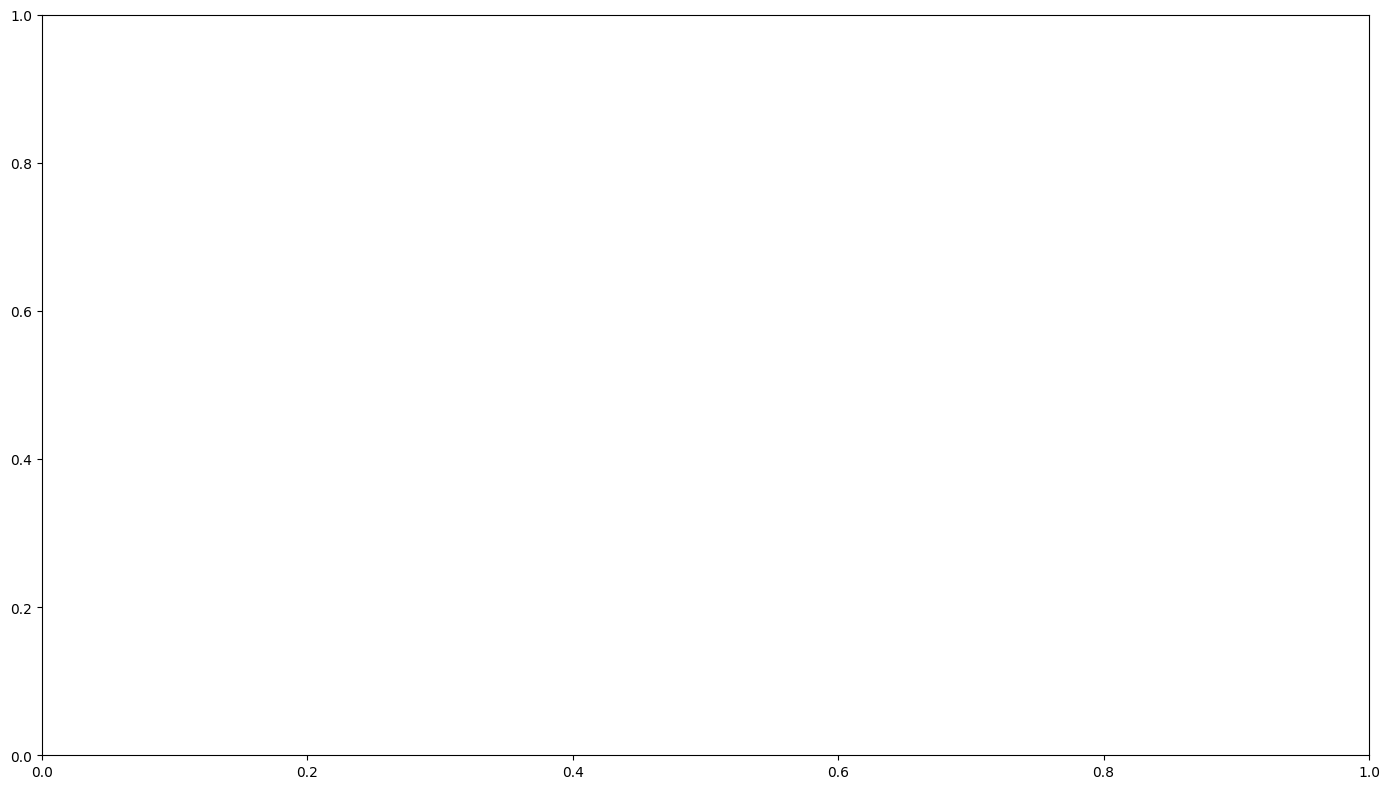

In [481]:
plt.figure(figsize=(13,9))
sns.histplot(data=data_normalized[:50]) #.set_tight_layout(False) 